### PEP8 Style Guidelines, Linters, and Magic Commands

One of Guido Van Rossum's (the inventor of Python) key insights is that code is read much more often than it is written. The PEP 8 style guidelines are intended to improve the readability of code and make it consistent across the wide spectrum of Python code. The full list of rules is located here: 

https://www.python.org/dev/peps/pep-0008/

Some main things to remember are:

1.Indentation should be four spaces.

2.Put spaces around operations like +, -, ==, etc.

3.Don't put spaces around keywords or parameters (ex: def function(greeting='hello').

Here is a well-styled cell of code:

In [1]:
def next_birthday(name='John Doe', age=18):
    age = age + 1
    return f'Hi my name is {name} and I will be {age} next year.'

next_birthday('Sally', 6)

'Hi my name is Sally and I will be 7 next year.'

In order to check that our code is clean and satisfies PEP 8 guidelines, we can use a linter. A linter or lint refers to tools that analyze source code to flag programming errors, bugs, stylistic errors, and suspicious constructs. To install a linter to use in Jupyter Notebook, open up a Terminal (on a Mac, located under Applications - Utilities - Terminal) or on a PC, under Anaconda Prompt. Then type the following:

pip install pycodestyle flake8

pip install pycodestyle_magic

Some common installation errors:

If you get an error about msgpack or some other package needing to be installed when trying to run the above commands, type "pip install msgpack" or "pip install {whatever the package is} first and then try again.

If you get an error involving disutils not being able to uninstall a package called pyflakes or something else, try typing first:


pip install pycodestyle flake8 --ignore-installed pyflakes


Now, we can use magic linting commands. Python has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

You have already used a line magic command in the past with plotting. Writing the line %matplotlib inline allows you to not have to write the line plt.show():


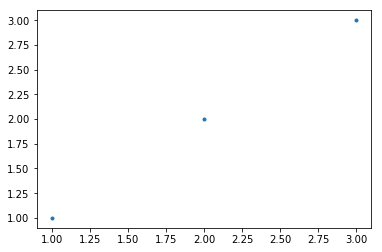

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3], [1,2,3], '.')

Now we can use a cell magic to help us with linting. First, run the cell below:

In [1]:
%load_ext pycodestyle_magic

Now, run this cell:

In [2]:
%%pycodestyle

def next_birthday(name = 'John Doe', age = 18):
  age=age+1
  return f'Hi my name is {name} and I will be {age} next year.'

next_birthday('Sally', 6)

3:1: E302 expected 2 blank lines, found 1
3:23: E251 unexpected spaces around keyword / parameter equals
3:25: E251 unexpected spaces around keyword / parameter equals
3:41: E251 unexpected spaces around keyword / parameter equals
3:43: E251 unexpected spaces around keyword / parameter equals
4:3: E111 indentation is not a multiple of four
4:6: E225 missing whitespace around operator
5:3: E111 indentation is not a multiple of four
7:1: E305 expected 2 blank lines after class or function definition, found 1


Uh oh, we've got a bunch of issues to clear up. First, it says that it expects two blank lines after %%pycodestyle. Once we add another one in, we should get rid of that error:

In [6]:
%%pycodestyle


def next_birthday(name = 'John Doe', age = 18):
  age=age+1
  return f'Hi my name is {name} and I will be {age} next year.'

next_birthday('Sally', 6)

4:23: E251 unexpected spaces around keyword / parameter equals
4:25: E251 unexpected spaces around keyword / parameter equals
4:41: E251 unexpected spaces around keyword / parameter equals
4:43: E251 unexpected spaces around keyword / parameter equals
5:3: E111 indentation is not a multiple of four
5:6: E225 missing whitespace around operator
6:3: E111 indentation is not a multiple of four
8:1: E305 expected 2 blank lines after class or function definition, found 1


Now, we should get rid of spaces around the keyword arguments and add spaces to the operations:

In [7]:
%%pycodestyle


def next_birthday(name='John Doe', age=18):
  age = age + 1
  return f'Hi my name is {name} and I will be {age} next year.'

next_birthday('Sally', 6)

5:3: E111 indentation is not a multiple of four
6:3: E111 indentation is not a multiple of four
8:1: E305 expected 2 blank lines after class or function definition, found 1


Now we should fix our indentation:

In [8]:
%%pycodestyle


def next_birthday(name='John Doe', age=18):
    age = age + 1
    return f'Hi my name is {name} and I will be {age} next year.'

next_birthday('Sally', 6)

8:1: E305 expected 2 blank lines after class or function definition, found 1


Finally, put two blank spaces after the end of your function:

In [9]:
%%pycodestyle


def next_birthday(name='John Doe', age=18):
    age = age + 1
    return f'Hi my name is {name} and I will be {age} next year.'


next_birthday('Sally', 6)

### Exercise: Clean up the code below using a linter.

In [10]:
%%pycodestyle

def insult(name = "John Doe", age = 18):
  if age>25:
    return f"You're old, {name}!"
  else:
    return f"You're going to be old soon enough, {name}!" 

insult('Kanye',40)


3:1: E302 expected 2 blank lines, found 1
3:16: E251 unexpected spaces around keyword / parameter equals
3:18: E251 unexpected spaces around keyword / parameter equals
3:34: E251 unexpected spaces around keyword / parameter equals
3:36: E251 unexpected spaces around keyword / parameter equals
4:3: E111 indentation is not a multiple of four
4:9: E225 missing whitespace around operator
6:3: E111 indentation is not a multiple of four
7:58: W291 trailing whitespace
9:1: E305 expected 2 blank lines after class or function definition, found 1
9:15: E231 missing whitespace after ','


One last type of magic command that is helpful is timeit. Timeit allows you to time how fast your algorithm takes to run, in order to compare which algorithm may be most efficient. 

Here's one example where we check all of the numbers between 2 and 16785407 before deciding if 16785408 is prime. It runs on a scale of seconds:

In [11]:
%%timeit

def is_prime(n):
    prime = True
    for i in range(2,n):
        if n % i == 0:
            prime = False
    return prime


is_prime(16785408)

1 loop, best of 3: 1.83 s per loop


We notice that if we break out of the loop with a return statement as soon as we find a divisor, we can determine that 16785408 is not prime much faster, on the scale of nanoseconds:

In [12]:
%%timeit

def is_prime(n):
    for i in range(2,n):
        if n % i == 0:
            return False
    return True


is_prime(16785408)

The slowest run took 6.12 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 819 ns per loop


### Directions: For the remainder of the exercises below, correct all linting errors.

### Functions Review
Before we start our scrabble problems, we want to make sure you get a quick review of functions. Recall that in your last assignment, you created frequency lists of how often items occurred. Let's make more general functions that do this that you can re-use in the future.

1.Write a function called item_frequency that takes in a list of items and returns a list of tuples containing (item, frequency) in descending order. DO NOT use the collections package. For example, 

```python
item_frequency(['hi', 'my', 'name', 'kanye', 'and', 'i', 'love', 'kanye', 'and', 'if', 'my', 'name', 'wasnt', 'kanye', 'then', 'i', 'would', 'change', 'it', 'to', 'kanye']) 
```

should return:

```python
[('kanye', 4),
 ('my', 2),
 ('name', 2),
 ('and', 2),
 ('i', 2),
 ('hi', 1),
 ('love', 1),
 ('if', 1),
 ('wasnt', 1),
 ('then', 1),
 ('would', 1),
 ('change', 1),
 ('it', 1),
 ('to', 1)]
 ```

In [ ]:
#insert exercise 1

2.Redo the previous exercise but now use the Counter tool in the collections package as well as its most_common method. You can read its documentation here:

https://docs.python.org/2/library/collections.html

Note: Doing it this way should reduce your code to only two or three lines!

In [4]:
#insert exercise 2
from collections import Counter

def item_frequency(items):
    return Counter(items).most_common()

item_frequency(['hi', 'my', 'name', 'kanye', 'and', 'i', 'love', 'kanye', 'and', 'if', 'my', 'name', 'wasnt', 'kanye', 'then', 'i', 'would', 'change', 'it', 'to', 'kanye'])


[('kanye', 4),
 ('my', 2),
 ('name', 2),
 ('and', 2),
 ('i', 2),
 ('hi', 1),
 ('love', 1),
 ('if', 1),
 ('wasnt', 1),
 ('then', 1),
 ('would', 1),
 ('change', 1),
 ('it', 1),
 ('to', 1)]

3.Now, make a function called word_frequency that takes in a string and returns a list of tuples containing (word, frequency) in descending order. Your function word_frequency should call your item_frequency function that you already wrote. By doing this, your new function should only be two or three lines long.

In [5]:
#insert exercise 3

def word_frequency(sentence):
    words = sentence.split() #breaks string into words
    word_tuple_list = item_frequency(words)
    return word_tuple_list

word_frequency('my name is lauren lauren lauren my')

[('lauren', 3), ('my', 2), ('name', 1), ('is', 1)]

4.Now, make a function called letter_frequency that takes in a string and returns a list of tuples containing (letter, frequency) in descending order. Your function letter_frequency should call your item_frequency function that you already wrote. By doing this, your new function should only be two or three lines long.

In [6]:
#insert exercise 4

def letter_frequency(sentence):
    letters = list(sentence) #breaks string into letters
    letter_tuple_list = item_frequency(letters)
    return letter_tuple_list

letter_frequency('my name is lauren lauren lauren my')

[(' ', 6),
 ('n', 4),
 ('a', 4),
 ('e', 4),
 ('m', 3),
 ('l', 3),
 ('u', 3),
 ('r', 3),
 ('y', 2),
 ('i', 1),
 ('s', 1)]

### Scrabble

Thanks to Scrabble$^{TM}$, we have easy access to a list of almost all the possible words in the English language.  In this problem, you will access this list of over 260,000 words to find some very unique words.

First, your program will read the entire SOWPODS list of acceptable Scrabble$^{TM}$ words. 

We'll learn about file input/output more later, but for now, you can use the following code to read in all of the words in the Scrabble dictionary and save them in a list called words.

In [7]:
word_file = open('sowpods.txt','r')

words = []

for word in word_file.readlines():
    words.append(word.strip())

1.What is the 10th word in the list of words?

In [1]:
#insert 1

2.What is the fifth to last word in the list of words? What does it mean?

In [2]:
#insert 2

3.What index is the word zymurgies in the list? What does the word mean?

In [3]:
#insert 3

4.Create a dictionary called letter_value for each letter's values according to the following values.

A=26, B=25, C=24, ..., Z=1


In [4]:
#insert 4

5.The dollar value of the word kanye is 79, since:

k 16, a 26, n 13, y 2, e 22

sum=79

Create a function called dollar_value that takes in a word and returns the dollar value.

Then calculate the dollar value of the word breatharian. What does the word mean?

In [5]:
#insert 5

6.Calculate the dollar value of each word in the Scrabble list without creating any new dictionaries. Which unique word has the highest dollar value and what is the word? What does the word mean?

In [6]:
#insert 6

7.Create a dictionary called word_value in which the keys are the dollar values and the dictionary values are the list of words with that dollar value. Print the ten smallest dollar values and the ten lists of words associated with them.

In [7]:
#insert 7

8.Print the ten largest dollar values and the ten lists of words associated with them.

In [8]:
#insert 8

9.Print the dollar value that has the largest list of words associated with it. Hint: You may want to use the word_value dictionary you already have and use it to create a sorted list of tuples.

In [9]:
#insert 9

10.Use matplotlib to create a histogram of the distribution of all of the lengths of the word lists associated with each dollar value in the Scrabble list. For example, you should see a high peak around 1, since many dollar values have only one word associated with them. You should also see a secondary peak around 2500, since many dollar values have around 2500 words associated with them.

In [10]:
#insert 10

11.Use matplotlib to create a histogram of the distribution of all of the dollar values for each of the words. Use 200 bins for your histogram. You should see a high peak around 129, since there are 2542 words with that dollar value.

In [11]:
#insert 11

12.Write a program called is_prime that takes in a positive integer and returns whether or not it is prime. Use return commands to write it in the least amount of lines.

In [12]:
#insert 12

13.Interestingly, Kanye's dollar value ($79) is also a prime number.  Search the entire SOWPODS list of words and find which prime number value between 175 dollars and 275 dollars has the fewest words associated with it.  Then print those words. 

In [13]:
#insert 13